# Modelo 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/Shareddrives/IA - Detección de Plagio - 8vo/reto"
!ls

/content/drive/Shareddrives/IA - Detección de Plagio - 8vo/reto
 000.java	'1 LogisticRegression.ipynb'   limpieza.ipynb
 001.java	'3 CNN.ipynb'		       max_length.joblib
 003.java	 5449d33c.java		       modelo2.ipynb
 004.java	'5 Loaded Model.ipynb'	       procesado.ipynb
 00af3420.java	'6 Identifier.ipynb'	       RandomForestClassifier.ipynb
 017.java	 base.csv		       tokenizer.joblib
 022.java	 classifier.joblib	       versions


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Cargar los datos
df = pd.read_csv('base.csv')

In [6]:
df

,Name1,Code1,Name2,Code2,Similitud,problem,verdict
0,0017d438,import java.io.BufferedReader;\nimport java.io...,9852706b,import java.io.BufferedReader;\nimport java.io...,0.659862,9,1
1,0017d438,import java.io.BufferedReader;\nimport java.io...,ac180326,import java.io.BufferedReader;\nimport java.io...,0.582237,9,0
2,0048a372,import java.io.*;\nimport java.util.*;\n\npubl...,0adb1ee5,import java.util.*;\n// import java.lang.*;\ni...,0.437342,8,0
3,00af3420,import java.util.*;\nimport java.io.*;\n\npubl...,5449d33c,import java.io.*;\nimport java.util.*;\nimport...,0.529478,15,0
4,00af3420,import java.util.*;\nimport java.io.*;\n\npubl...,86102d81,import java.io.*;\nimport java.util.*;\n\t\t\n...,0.570880,15,0
...,...,...,...,...,...,...,...
906,eea69e7f,import java.util.*;\n\npublic class Solution {...,f6ca6fc8,import java.util.*;\nimport java.io.*;\n\npubl...,0.494697,19,0
907,f229aa7f,import java.util.*;\nimport java.io.*;\nimport...,fcc7e8fa,import java.io.OutputStream;\nimport java.io.I...,0.338990,4,0
908,f28b8cb4,import java.io.BufferedReader;\nimport java.io...,ff3283cf,import java.util.*;\nimport java.lang.*;\nimpo...,0.588601,8,0
909,fadc1365,import java.io.PrintWriter;\nimport java.io.Bu...,fdd85afb,import java.util.*;\n\npublic class Solution{\...,0.588751,8,0


In [40]:
# Dividir en train y test (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [41]:
train_data = train_df[['Code1', 'Code2']]
train_labels = train_df['verdict']
test_data = test_df[['Code1', 'Code2']]
test_labels = test_df['verdict']

In [42]:
# Crear un vectorizador TF-IDF para convertir los códigos en características numéricas
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_data['Code1'] + train_data['Code2'])
test_features = vectorizer.transform(test_data['Code1'] + test_data['Code2'])

In [43]:
# Entrenar un modelo de regresión logística para clasificación binaria
model = LogisticRegression()
model.fit(train_features, train_labels)

# Predecir la similitud en el conjunto de prueba
predictions = model.predict(test_features)

# Calcular la precisión del modelo
accuracy = accuracy_score(test_labels, predictions)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7923497267759563


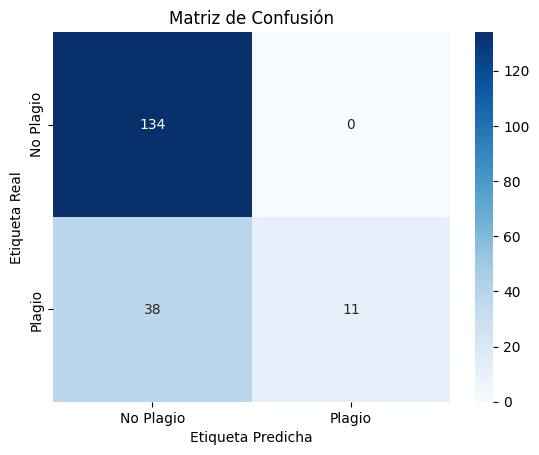

In [44]:
# Predecir la similitud en el conjunto de prueba
predictions = model.predict(test_features)

# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(test_labels, predictions)

# Generar el heatmap
# labels = np.unique(test_labels)
labels = ['No Plagio', 'Plagio']
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()